<a href="https://colab.research.google.com/github/cmarta22/Aprendizaje_Automatico/blob/main/Iris_arbol_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import learning_curve

In [ ]:
# 1. Cargar dataset completo
iris = load_iris()


In [ ]:
# Convertir a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target


In [ ]:
# Ver primeras filas
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [ ]:
# Resumen estadístico
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [ ]:
X = iris.data
y = iris.target
feature_names = iris.feature_names
X = np.array(X, dtype=float)
y = np.array(y, dtype=int)

In [ ]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Variables y etiquetas
X = df.drop("target", axis=1)  # todas las features
y = df["target"]


Division de entrenamiento y prueba

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = DecisionTreeClassifier(random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

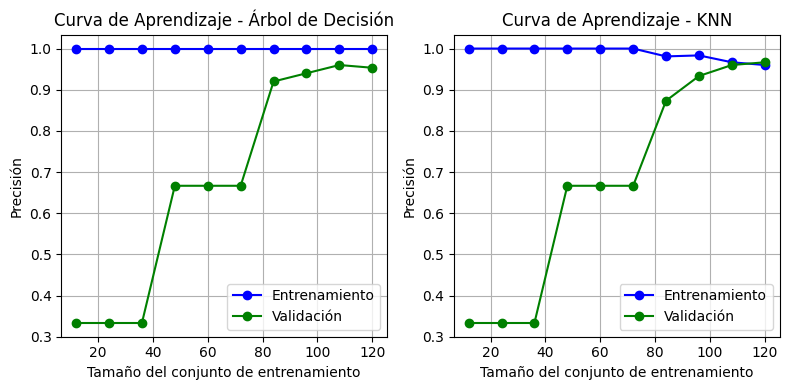

In [ ]:
# Modelos
modelos = {
    'Árbol de Decisión': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=3)
}

# Curvas de aprendizaje
plt.figure(figsize=(8, 4))

for i, (nombre, modelo) in enumerate(modelos.items(), 1):
    train_sizes, train_scores, test_scores = learning_curve(
        modelo, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.subplot(1, 2, i)
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Entrenamiento')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validación')
    plt.title(f'Curva de Aprendizaje - {nombre}')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Precisión')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

Modelo K-Nearest Neighbors (KNN)

Árbol de Decisión

In [ ]:
# Definir y entrenar modelos
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5)

tree_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Modelos
tree_clf = DecisionTreeClassifier(random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Entrenamiento
tree_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)

# Predicciones
y_pred_tree = tree_clf.predict(X_test)
y_pred_knn = knn_clf.predict(X_test)



In [ ]:
# Evaluación
print(" Métricas Árbol de Decisión")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree, target_names=iris.target_names))

print("\n Métricas K-NN")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn, target_names=iris.target_names))


 Métricas Árbol de Decisión
Accuracy: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


 Métricas K-NN
Accuracy: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Accuracy KNN: 1.0
Accuracy Árbol: 1.0


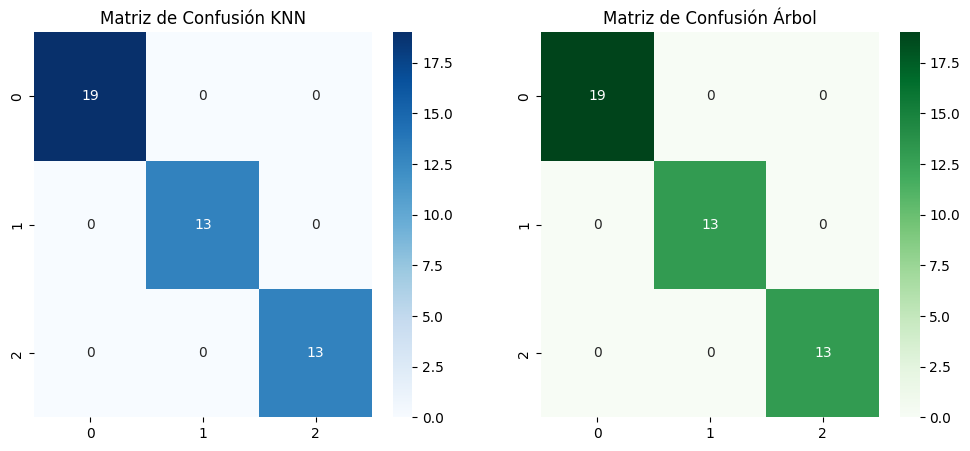

In [ ]:
print("Accuracy KNN:", accuracy_score(y_test, y_pred_knn))
print("Accuracy Árbol:", accuracy_score(y_test, y_pred_tree))

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", ax=ax[0], cmap="Blues")
ax[0].set_title("Matriz de Confusión KNN")

sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt="d", ax=ax[1], cmap="Greens")
ax[1].set_title("Matriz de Confusión Árbol")
plt.show()



Las predicciones correctas se encuentran en la diagonal principal, los números 19, 13 y 13 indican que el modelo clasificó correctamente todas las instancias de cada clase.

Las predicciones incorrectas se encuentran fuera de la diagonal principal, en este caso, todos los valores fuera de la diagonal son cero, lo que significa que no hubo errores de clasificación.

Ambos modelos identificaron correctamente todas las clases (setosa, versicolor, virginica).

Esto indica que, en este caso, tanto KNN como el Árbol de Decisión son igual de efectivos.



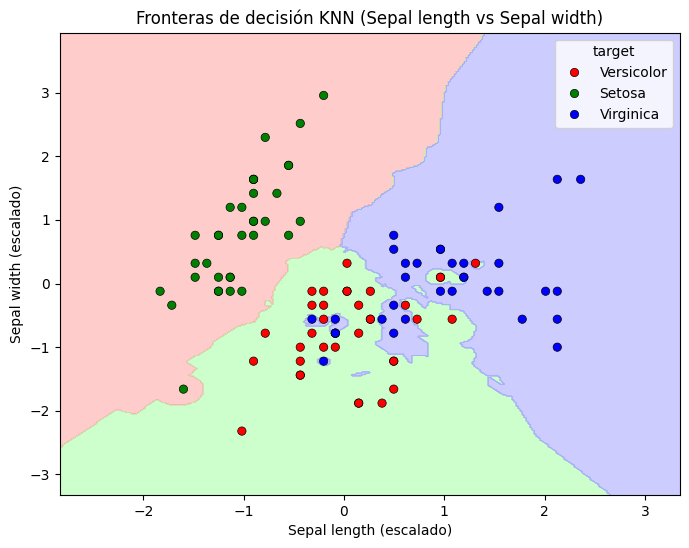

In [ ]:
# Elegimos solo las 2 primeras features para graficar
X_simple2 = df[["sepal length (cm)", "sepal width (cm)"]]
y_simple2 = df["target"]

# División en entrenamiento y prueba

X_train_s2, X_test_s2, y_train_s2, y_test_s2 = train_test_split(
    X_simple2, y_simple2, test_size=0.3, random_state=42, stratify=y_simple2
)

# Escalado de datos
scaler = StandardScaler()
X_train_s2_scaled = scaler.fit_transform(X_train_s2)
X_test_s2_scaled = scaler.transform(X_test_s2)

# Entrenar KNN
knn_simple2 = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_simple2.fit(X_train_s2_scaled, y_train_s2)

# Definir malla para graficar
h = 0.02
x_min, x_max = X_train_s2_scaled[:, 0].min() - 1, X_train_s2_scaled[:, 0].max() + 1
y_min, y_max = X_train_s2_scaled[:, 1].min() - 1, X_train_s2_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


Z = knn_simple2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Colores
cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold = ["red", "green", "blue"]

# Graficar
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
sns.scatterplot(
    x=X_train_s2_scaled[:, 0],
    y=X_train_s2_scaled[:, 1],
    hue=y_train_s2.map({0:"Setosa", 1:"Versicolor", 2:"Virginica"}),
    palette=cmap_bold,
    edgecolor="k"
)
plt.title("Fronteras de decisión KNN (Sepal length vs Sepal width)")
plt.xlabel("Sepal length (escalado)")
plt.ylabel("Sepal width (escalado)")
plt.show()

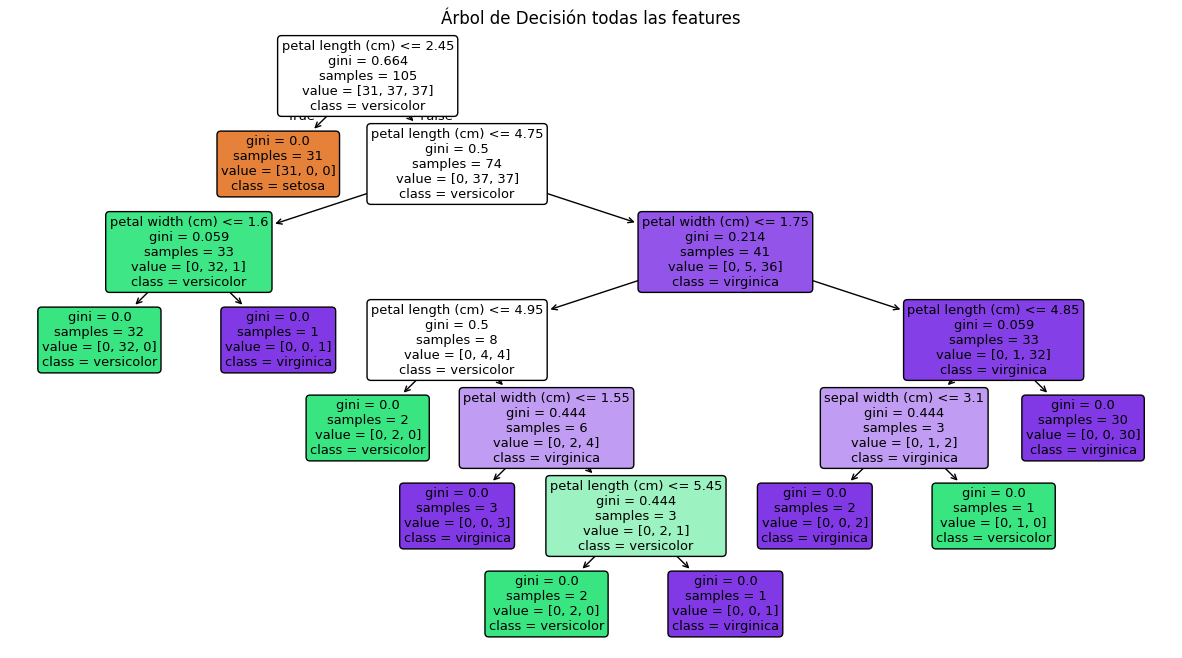

In [ ]:
# Árbol de Decisión completo
plt.figure(figsize=(15,8))
plot_tree(
    tree_clf,
    feature_names=X.columns,
    class_names=iris.target_names,
    filled=True,
    rounded=True
)
plt.title("Árbol de Decisión todas las features")
plt.show()

Las predicciones correctas se encuentran en la diagonal principal, los números 19, 13 y 13 indican que el modelo clasificó correctamente todas las instancias de cada clase.

Las predicciones incorrectas se encuentran fuera de la diagonal principal, en este caso, todos los valores fuera de la diagonal son cero, lo que significa que no hubo errores de clasificación.

Ambos modelos identificaron correctamente todas las clases (setosa, versicolor, virginica)

Esto indica que, en este caso, tanto KNN como el Árbol de Decisión son igual de efectivos.


El árbol divide los datos en función de las características, como el ancho y largo del pétalo.

Las decisiones se toman de forma jerárquica: primero se separan las clases más fáciles (setosa), luego las más similares (versicolor vs virginica).

El modelo logra clasificaciones puras (gini = 0) en los nodos hoja, lo que indica que el árbol está bien ajustado para este conjunto.
